In [19]:
# Data vizualisation
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, learning_curve
from sklearn.decomposition import PCA

# To test the performance of the models used
from sklearn import metrics

# Classification
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.svm import SVC

# Resampling 
from sklearn.utils import resample

In [2]:
data_iono = pd.read_csv('./ionosphere.csv')
data_iono.head()

,col1,col2,col3,col4,col5,col6,col7,col8,col9,col10,...,col26,col27,col28,col29,col30,col31,col32,col33,col34,class
0,1,0,0.99539,-0.05889,0.85243,0.02306,0.83398,-0.37708,1.00000,0.03760,...,-0.51171,0.41078,-0.46168,0.21266,-0.34090,0.42267,-0.54487,0.18641,-0.45300,g
1,1,0,1.00000,-0.18829,0.93035,-0.36156,-0.10868,-0.93597,1.00000,-0.04549,...,-0.26569,-0.20468,-0.18401,-0.19040,-0.11593,-0.16626,-0.06288,-0.13738,-0.02447,b
2,1,0,1.00000,-0.03365,1.00000,0.00485,1.00000,-0.12062,0.88965,0.01198,...,-0.40220,0.58984,-0.22145,0.43100,-0.17365,0.60436,-0.24180,0.56045,-0.38238,g
3,1,0,1.00000,-0.45161,1.00000,1.00000,0.71216,-1.00000,0.00000,0.00000,...,0.90695,0.51613,1.00000,1.00000,-0.20099,0.25682,1.00000,-0.32382,1.00000,b
4,1,0,1.00000,-0.02401,0.94140,0.06531,0.92106,-0.23255,0.77152,-0.16399,...,-0.65158,0.13290,-0.53206,0.02431,-0.62197,-0.05707,-0.59573,-0.04608,-0.65697,g


In [3]:
data_iono.describe()

,col1,col2,col3,col4,col5,col6,col7,col8,col9,col10,...,col25,col26,col27,col28,col29,col30,col31,col32,col33,col34
count,351.000000,351.0,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,...,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000
mean,0.891738,0.0,0.641342,0.044372,0.601068,0.115889,0.550095,0.119360,0.511848,0.181345,...,0.396135,-0.071187,0.541641,-0.069538,0.378445,-0.027907,0.352514,-0.003794,0.349364,0.014480
std,0.311155,0.0,0.497708,0.441435,0.519862,0.460810,0.492654,0.520750,0.507066,0.483851,...,0.578451,0.508495,0.516205,0.550025,0.575886,0.507974,0.571483,0.513574,0.522663,0.468337
min,0.000000,0.0,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
25%,1.000000,0.0,0.472135,-0.064735,0.412660,-0.024795,0.211310,-0.054840,0.087110,-0.048075,...,0.000000,-0.332390,0.286435,-0.443165,0.000000,-0.236885,0.000000,-0.242595,0.000000,-0.165350
50%,1.000000,0.0,0.871110,0.016310,0.809200,0.022800,0.728730,0.014710,0.684210,0.018290,...,0.553890,-0.015050,0.708240,-0.017690,0.496640,0.000000,0.442770,0.000000,0.409560,0.000000
75%,1.000000,0.0,1.000000,0.194185,1.000000,0.334655,0.969240,0.445675,0.953240,0.534195,...,0.905240,0.156765,0.999945,0.153535,0.883465,0.154075,0.857620,0.200120,0.813765,0.171660
max,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [4]:
data_iono['col1'].value_counts()

1    313
0     38
Name: col1, dtype: int64

In [5]:
data_iono['col2'].value_counts()

0    351
Name: col2, dtype: int64

In [6]:
data_iono.drop(['col2'], axis=1, inplace=True)
data_iono.head()

,col1,col3,col4,col5,col6,col7,col8,col9,col10,col11,...,col26,col27,col28,col29,col30,col31,col32,col33,col34,class
0,1,0.99539,-0.05889,0.85243,0.02306,0.83398,-0.37708,1.00000,0.03760,0.85243,...,-0.51171,0.41078,-0.46168,0.21266,-0.34090,0.42267,-0.54487,0.18641,-0.45300,g
1,1,1.00000,-0.18829,0.93035,-0.36156,-0.10868,-0.93597,1.00000,-0.04549,0.50874,...,-0.26569,-0.20468,-0.18401,-0.19040,-0.11593,-0.16626,-0.06288,-0.13738,-0.02447,b
2,1,1.00000,-0.03365,1.00000,0.00485,1.00000,-0.12062,0.88965,0.01198,0.73082,...,-0.40220,0.58984,-0.22145,0.43100,-0.17365,0.60436,-0.24180,0.56045,-0.38238,g
3,1,1.00000,-0.45161,1.00000,1.00000,0.71216,-1.00000,0.00000,0.00000,0.00000,...,0.90695,0.51613,1.00000,1.00000,-0.20099,0.25682,1.00000,-0.32382,1.00000,b
4,1,1.00000,-0.02401,0.94140,0.06531,0.92106,-0.23255,0.77152,-0.16399,0.52798,...,-0.65158,0.13290,-0.53206,0.02431,-0.62197,-0.05707,-0.59573,-0.04608,-0.65697,g


Text(0.5, 1.0, 'Correlation matrix')

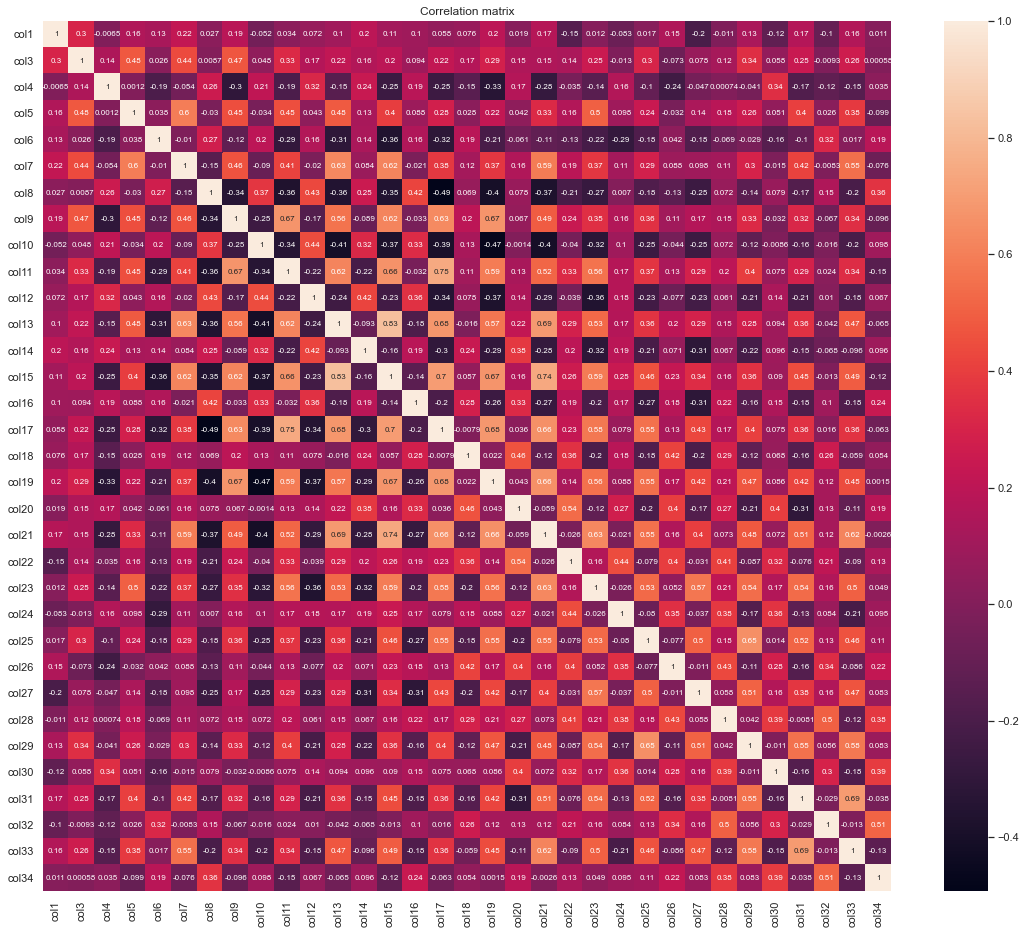

In [7]:
sns.set_theme(style='darkgrid')
plt.figure(figsize=(19,16))
sns.heatmap(data_iono.corr(), annot=True, annot_kws={"size": 8})
plt.title("Correlation matrix")

### Classification

In [8]:
features_iono = data_iono.copy()
etiq = features_iono['class']
features_iono.drop(['class'], axis=1, inplace=True)
features_iono.head()

,col1,col3,col4,col5,col6,col7,col8,col9,col10,col11,...,col25,col26,col27,col28,col29,col30,col31,col32,col33,col34
0,1,0.99539,-0.05889,0.85243,0.02306,0.83398,-0.37708,1.00000,0.03760,0.85243,...,0.56811,-0.51171,0.41078,-0.46168,0.21266,-0.34090,0.42267,-0.54487,0.18641,-0.45300
1,1,1.00000,-0.18829,0.93035,-0.36156,-0.10868,-0.93597,1.00000,-0.04549,0.50874,...,-0.20332,-0.26569,-0.20468,-0.18401,-0.19040,-0.11593,-0.16626,-0.06288,-0.13738,-0.02447
2,1,1.00000,-0.03365,1.00000,0.00485,1.00000,-0.12062,0.88965,0.01198,0.73082,...,0.57528,-0.40220,0.58984,-0.22145,0.43100,-0.17365,0.60436,-0.24180,0.56045,-0.38238
3,1,1.00000,-0.45161,1.00000,1.00000,0.71216,-1.00000,0.00000,0.00000,0.00000,...,1.00000,0.90695,0.51613,1.00000,1.00000,-0.20099,0.25682,1.00000,-0.32382,1.00000
4,1,1.00000,-0.02401,0.94140,0.06531,0.92106,-0.23255,0.77152,-0.16399,0.52798,...,0.03286,-0.65158,0.13290,-0.53206,0.02431,-0.62197,-0.05707,-0.59573,-0.04608,-0.65697


In [9]:
fv_train, fv_test, etiq_train, etiq_test = train_test_split(features_iono, etiq, test_size=0.3,random_state=23)

In [10]:
parameters = {'n_neighbors':np.arange(1,20,1), 'p' : np.arange(1,3,1)}
knn=KNeighborsClassifier()
clf = GridSearchCV(knn, parameters, scoring='f1_macro')
clf.fit(fv_train,etiq_train)

knn=KNeighborsClassifier(**clf.best_params_)
knn.fit(fv_train,etiq_train)

KNeighborsClassifier(n_neighbors=4, p=1)

In [11]:
N, train_score, val_score = learning_curve(knn, fv_train, etiq_train, train_sizes=np.linspace(0.1, 1.0, 10), cv = 5)

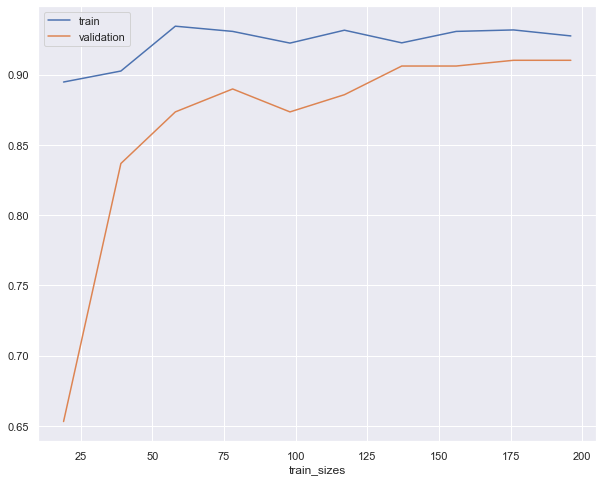

In [12]:
plt.figure(figsize=(10,8))
plt.plot(N, train_score.mean(axis=1), label='train')
plt.plot(N, val_score.mean(axis=1), label='validation')
plt.xlabel('train_sizes')
plt.legend()

In [13]:
yknn=knn.predict(fv_test)
print("KNN accuracy rate in testing : ",metrics.accuracy_score(etiq_test, yknn))
print("KNN F1-score : ",metrics.f1_score(etiq_test, yknn, average='macro'))

KNN accuracy rate in testing :  0.9339622641509434
KNN F1-score :  0.9223443223443224


Text(0.5, 1.0, 'Confusion matrix')

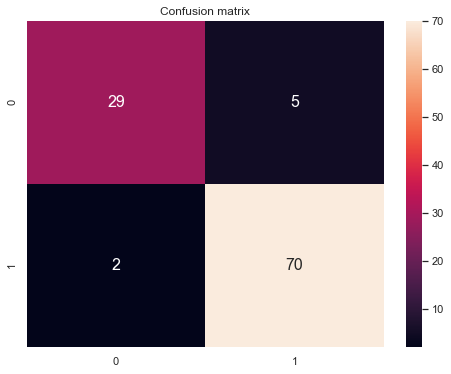

In [14]:
plt.figure(figsize=(8,6))
sns.heatmap(metrics.confusion_matrix(etiq_test, yknn), annot=True, annot_kws={"size": 16})
plt.title("Confusion matrix")

### Random Forrest

In [15]:
forrest = RandomForestClassifier(n_estimators = 55, max_features = 'log2', criterion = 'entropy', class_weight='balanced', random_state = 10).fit(fv_train,etiq_train)
yforrest = forrest.predict(fv_test)
print("Accuracy : ",metrics.accuracy_score(etiq_test, yforrest))
print("F1-score : ",metrics.f1_score(etiq_test, yforrest, average='macro'))

Accuracy :  0.9433962264150944
F1-score :  0.9350490196078431


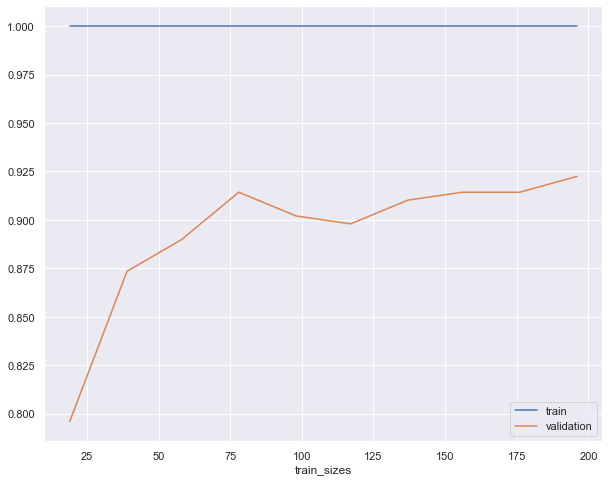

In [16]:
N, train_score, val_score = learning_curve(forrest, fv_train, etiq_train, train_sizes=np.linspace(0.1, 1.0, 10), cv = 5)
plt.figure(figsize=(10,8))
plt.plot(N, train_score.mean(axis=1), label='train')
plt.plot(N, val_score.mean(axis=1), label='validation')
plt.xlabel('train_sizes')
plt.legend()

We can see with this curve that by adding information (training data) we could increase the performance of the model 

### SVM

Accuracy :  0.9528301886792453
F1-score :  0.9445316588173731


Text(0.5, 1.0, 'Confusion matrix')

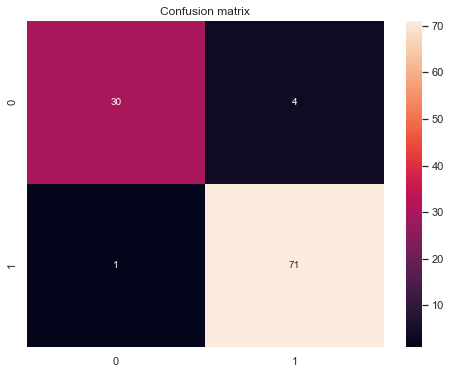

In [17]:
parameters = {'degree':np.arange(1,20,1)}
svm=SVC(gamma='scale', class_weight='balanced')
clf = GridSearchCV(svm, parameters, scoring='f1_macro')
clf.fit(fv_train,etiq_train)
svm=SVC(**clf.best_params_)
svm.fit(fv_train,etiq_train)
ysvm=svm.predict(fv_test)
print("Accuracy : ",metrics.accuracy_score(etiq_test, ysvm))
print("F1-score : ",metrics.f1_score(etiq_test, ysvm, average='macro'))

plt.figure(figsize=(8,6))
sns.heatmap(metrics.confusion_matrix(etiq_test, ysvm), annot=True, annot_kws={"size": 10})
plt.title('Confusion matrix')

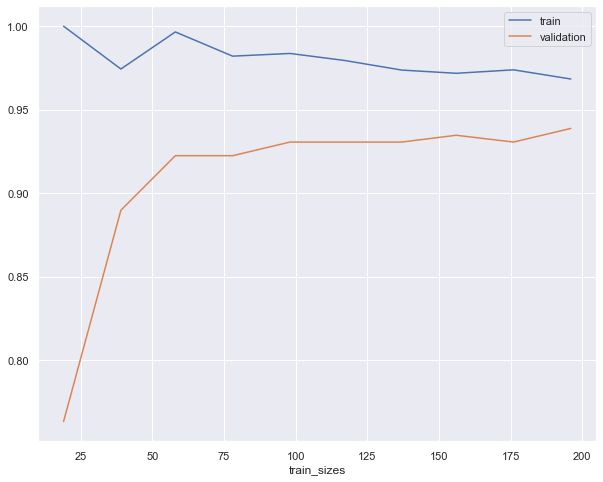

In [18]:
N, train_score, val_score = learning_curve(svm, fv_train, etiq_train, train_sizes=np.linspace(0.1, 1.0, 10), cv = 5)
plt.figure(figsize=(10,8))
plt.plot(N, train_score.mean(axis=1), label='train')
plt.plot(N, val_score.mean(axis=1), label='validation')
plt.xlabel('train_sizes')
plt.legend()

### Data augmentation

In [20]:
data_iono['class'].value_counts()

g    225
b    126
Name: class, dtype: int64

In [21]:
data_iono_resampling = data_iono.copy()
data_g = data_iono_resampling[data_iono_resampling["class"]=='g']
data_b = data_iono_resampling[data_iono_resampling["class"]=='b']

data_b = resample(data_b, replace=True, n_samples=225,random_state=123)

data_iono_balanced = pd.concat([data_g, data_b])
data_iono_balanced["class"].value_counts()

g    225
b    225
Name: class, dtype: int64

In [23]:
features_iono_balanced = data_iono_balanced.copy()
etiq_balanced = features_iono_balanced['class']
features_iono_balanced.drop(['class'], axis=1, inplace=True)

In [24]:
fv_train_balanced, fv_test_balanced, etiq_train_balanced, etiq_test_balanced = train_test_split(features_iono_balanced, etiq_balanced, test_size=0.3,random_state=23)

KNN accuracy rate in testing :  0.9851851851851852
KNN F1-score :  0.9851778656126482


Text(0.5, 1.0, 'Confusion matrix')

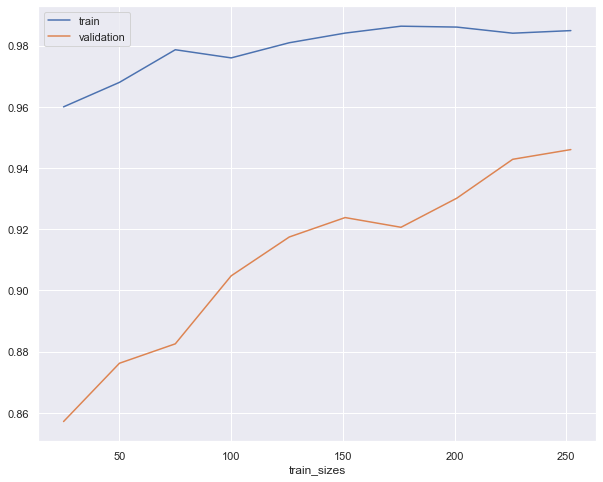

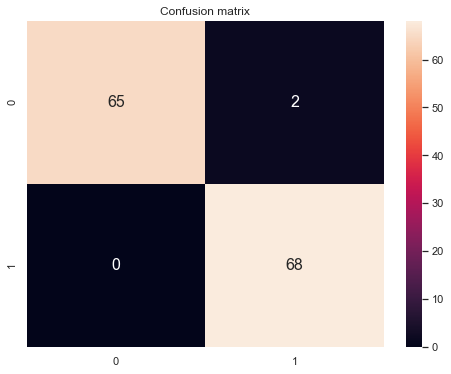

In [25]:
parameters = {'n_neighbors':np.arange(1,20,1), 'p' : np.arange(1,3,1)}
knn_balanced=KNeighborsClassifier()
clf = GridSearchCV(knn_balanced, parameters, scoring='f1_macro')
clf.fit(fv_train_balanced,etiq_train_balanced)

knn_balanced=KNeighborsClassifier(**clf.best_params_)
knn_balanced.fit(fv_train_balanced,etiq_train_balanced)

N, train_score_balanced, val_score_balanced = learning_curve(knn_balanced, fv_train_balanced, etiq_train_balanced, train_sizes=np.linspace(0.1, 1.0, 10), cv = 5)

plt.figure(figsize=(10,8))
plt.plot(N, train_score_balanced.mean(axis=1), label='train')
plt.plot(N, val_score_balanced.mean(axis=1), label='validation')
plt.xlabel('train_sizes')
plt.legend()

yknn_balanced=knn_balanced.predict(fv_test_balanced)
print("KNN accuracy rate in testing : ",metrics.accuracy_score(etiq_test_balanced, yknn_balanced))
print("KNN F1-score : ",metrics.f1_score(etiq_test_balanced, yknn_balanced, average='macro'))

plt.figure(figsize=(8,6))
sns.heatmap(metrics.confusion_matrix(etiq_test_balanced, yknn_balanced), annot=True, annot_kws={"size": 16})
plt.title("Confusion matrix")

#### Random Forrest

Accuracy :  0.9629629629629629
F1-score :  0.962962962962963


Text(0.5, 1.0, 'Confusion matrix')

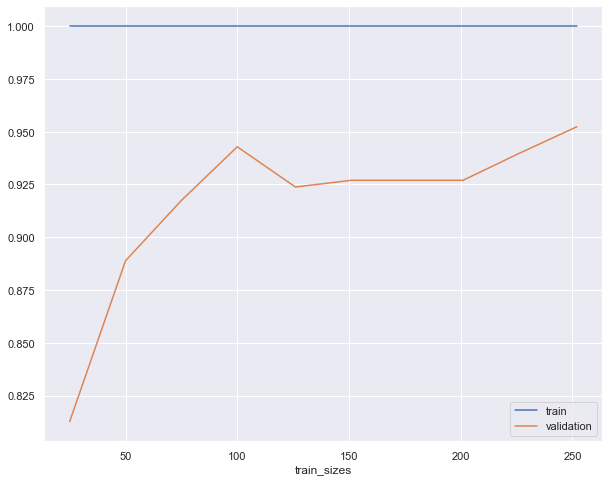

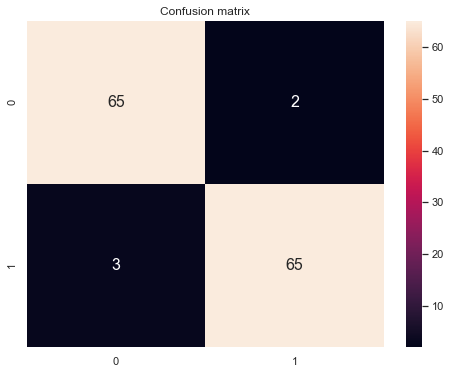

In [28]:
forrest_balanced = RandomForestClassifier(n_estimators = 55, max_features = 'log2', criterion = 'entropy', class_weight='balanced', random_state = 10).fit(fv_train_balanced,etiq_train_balanced)
yforrest_balanced = forrest_balanced.predict(fv_test_balanced)
print("Accuracy : ",metrics.accuracy_score(etiq_test_balanced, yforrest_balanced))
print("F1-score : ",metrics.f1_score(etiq_test_balanced, yforrest_balanced, average='macro'))

N, train_score, val_score = learning_curve(forrest_balanced, fv_train_balanced, etiq_train_balanced, train_sizes=np.linspace(0.1, 1.0, 10), cv = 5)
plt.figure(figsize=(10,8))
plt.plot(N, train_score.mean(axis=1), label='train')
plt.plot(N, val_score.mean(axis=1), label='validation')
plt.xlabel('train_sizes')
plt.legend()

plt.figure(figsize=(8,6))
sns.heatmap(metrics.confusion_matrix(etiq_test_balanced, yforrest_balanced), annot=True, annot_kws={"size": 16})
plt.title("Confusion matrix")

#### SVM 

Accuracy :  0.9777777777777777
F1-score :  0.9777728994017891


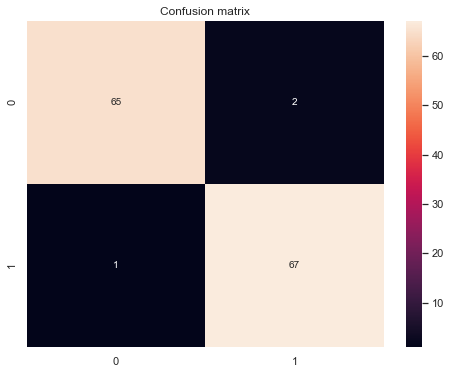

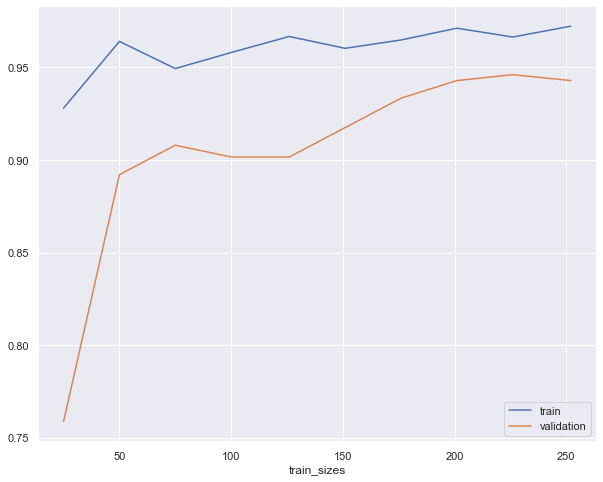

In [29]:
parameters = {'degree':np.arange(1,20,1)}
svm_balanced=SVC(gamma='scale', class_weight='balanced')
clf = GridSearchCV(svm_balanced, parameters, scoring='f1_macro')
clf.fit(fv_train_balanced,etiq_train_balanced)
svm_balanced=SVC(**clf.best_params_)
svm_balanced.fit(fv_train_balanced,etiq_train_balanced)
ysvm_balanced=svm_balanced.predict(fv_test_balanced)
print("Accuracy : ",metrics.accuracy_score(etiq_test_balanced, ysvm_balanced))
print("F1-score : ",metrics.f1_score(etiq_test_balanced, ysvm_balanced, average='macro'))

plt.figure(figsize=(8,6))
sns.heatmap(metrics.confusion_matrix(etiq_test_balanced, ysvm_balanced), annot=True, annot_kws={"size": 10})
plt.title('Confusion matrix')


N, train_score, val_score = learning_curve(svm_balanced, fv_train_balanced, etiq_train_balanced, train_sizes=np.linspace(0.1, 1.0, 10), cv = 5)
plt.figure(figsize=(10,8))
plt.plot(N, train_score.mean(axis=1), label='train')
plt.plot(N, val_score.mean(axis=1), label='validation')
plt.xlabel('train_sizes')
plt.legend()